# K-Means Clustering

K-Means clustering is an unsupervised ML model to find some patterns in the data.

**Clustering** means **grouping unlabelled data**.

## Importing the libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

This dataset by the strategic team of a mall of all the customers. Each row corresponds to a customer of this mall and for each of the customers we have the information of customer ID, Gendre, Annual income and Spending score (take value between 1 and 100). The spending score is a metric made by the mall to measure how much each customer spends.

Using K-Means clustering model, we want to understand **some patterns** within the customers. Note that, in supervised ML like regression or classification we knew what to predict, here we don't know what to predict as K-Means clustering model is an unsupervised ML model.

K-Means clustering model creates a dependent variable which can have finite number of categories/classes --> cluster-1, cluster-2, and so on.

In [42]:
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [43]:
dataset.isnull().sum()

# No missing values in the dataset.

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


The feature like Customer ID is not important for ML model. For visualization purposes, we can work only with 2 features. So, we will not consider all the features but only 2 features: Annual income and Spending score.

In [44]:
# Matrix of features
X = dataset.iloc[:, 3:5].values   # Extract values of all rows and column-3 to column-4 (column-5 will be excluded).
X

# Clearly no dependent variable vector here as K-Means clustering is an unsupervised ML model.

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Using the elbow method to find the optimal number of clusters

We will compute within cluster sum of squares (WCSS) for different number of clusters and from the plot of WCSS vs no. of clusters we identify the elbow/kink which gives the optimal no. of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

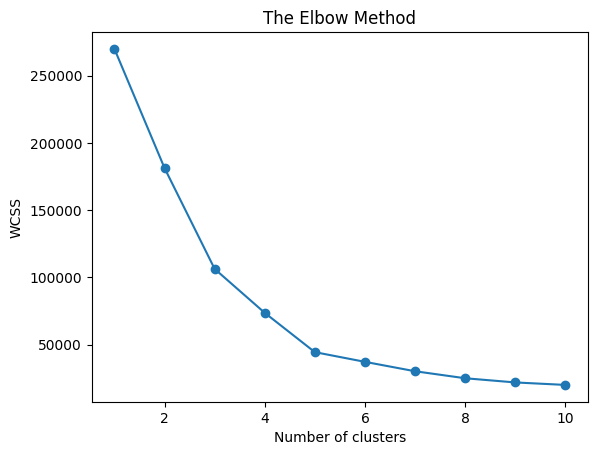

In [45]:
from sklearn.cluster import KMeans   # Import KMeans class from sklearn.cluster module.

# Compute WCSS for different number of clusters using for loop
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)   # Create an object of KMeans class. Each time number of cluster is the value of loop variable. Initial random seclection of centroids are done using K-Means++ method. In this line, model is built but not trained on the dataset.
    kmeans.fit(X)   # In this line, the built model is trained on the dataset using fit() function.
    wcss.append(kmeans.inertia_)   # The attribute 'intertia_' called after 'kmeans' object gives the value of WCSS.

# Plot
plt.plot(range(1, 11), wcss, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


We see from the plot of WCSS vs no. of clusters that the elbow/kink is at no. of clusters = 5 from which WCSS value starts slowing down. So, 5 is the optimal number of clusters.

## Training the K-Means model on the dataset

In [46]:
# Assign each observation or customer to a specific cluster out of 5 clusters

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)   # Create a dependent variable vector whose values are cluster indices. So, we will get cluster-0, 1, 2, 3, 4 (as python starts from 0 instead of 1). Each cluster is a group of similar customers. The fit_predict method not only trains the K-Means clustering model on the dataset but also it returns exactly the cluster index of each observation or customer. y_kmeans is an 1D array whose values are cluster indices for each observation or customer.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
 # y_kmeans is an 1D array whose values are cluster indices for each observation or customer.
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


So we find that first customer belongs to cluster-4 (python index 4), 2nd cluster belongs to cluster-3 (python index 2) and so on.

This is the dependent variable created through the training of the K-Means algorithm.

## Visualising the clusters

We will now visualize the clusters in a 2D plot. Here x-axis is one feature: Annual income and y-axis is another feature: Spending score.

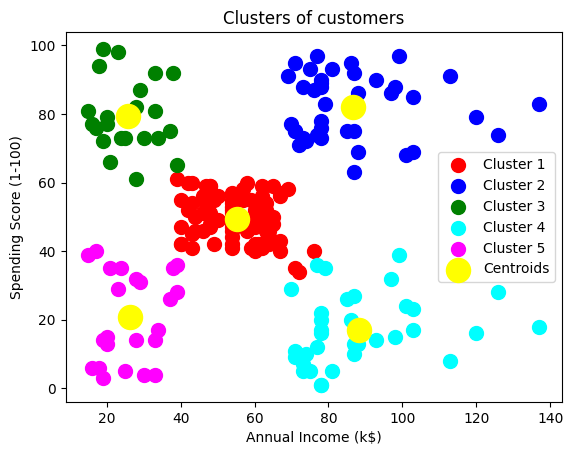

In [48]:
# We will do scatter plot for each of the clusters. We specify size, color and label for each cluster.
# x-data input to the plt.scatter() function is one feature and y-data input is another feature, both for same
# cluster index. Other inputs are size, color and label. This we have to do for all the clusters. In the plot
# x-coordinate will be Annual income (feature-1) and y-coordinate will be Spending score (feature-2).

# We extract specific feature for specific cluster by following way: To slice specific rows and specific columns
# from the matrix of features X, write: X[row-i: rwo-f, col-i:col-f] where row-i is initial row, row-f is final row,
# col-i is initial column and col-f is the final column to be sliced from the whole X. Slicing is done by colon(:) and
# row slicing is separated from column slicing by a comma(,).

# Each scatter plot is for each cluster. So we select the rows for the corresponding cluster index, and columns
# for each feature in the scatter plot.

# Scatter plot for each cluter
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# Scatter plot for centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')   # Call the 'cluster_centers_' attribute from 'kmeans' object. The 'cluster_centers_' attribute is a 2D array in which rows correspond to different centroids and columns correspond to their coordinates in the feature space, each column is for one feature.

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


We clearly see 5 clusters in the scatter plot of the data points in the feature space. 5 clusters correspond to 5 groups: (i) less income, less spend, (ii) less income, high spend, (iii) mediam income, mediam spend, (iv) high income, less spend and (v) high income, high spend.

We have to make **business strategy** from this clustering analysis using K-Means clustering model. Target most to the cluster-2 (high income, high spend) when there is new offer, because with this customers there is highest chance to sell the products. Social responsibility or ethich of the mall tells not to target so much to the cluster-3 (low income, high spend). So advertise more to cluster-2 and less advertise to cluster-3. Also don't target to the cluster-5 (less income, less spend). Interesting to target will be cluster-4 (high income, less spend) as may be we are missing these customers who have capability of buying procucts but they are not buying. Give more advertisement to these customers.

This is the main aim of clustering: we identify patterns or clusters in the data, for each of them we can deploy different marketing strategies.